In [1]:
from collections import OrderedDict

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

## CompositeLayer is an nn.Module with the following layers (in order):

### 1. BatchNorm2d with default parameters
### 2. ReLU
### 3. Conv2d with kernel_size=1, stride=1, bias=False, all others default values
### 4. BatchNorm2d with default parameters
### 5. ReLU
### 6. Conv2d with kernel_size=3, stride=1, padding=1, bias=False, all others default values

#### These layers are connected in a sequential order (i.e., 1-2-3-4-5-6)

## Fill the blanks marked by "##ToAdd:" in the following cell (30 points)

In [27]:
class CompositeLayer(nn.Module):
    def __init__(self, num_input_features, num_hidden_features, num_output_features):
        """
        Arguments:
            num_input_features: int, num_features for the first BatchNorm2d
            num_hidden_features: int, out_channels for the first Conv2d
            num_output_features: int, out_channels for the second Conv2d
        """
        super(CompositeLayer, self).__init__()
        ##ToAdd: layer BatchNorm2d with default parameters (5 points)
        self.batch_norm1 = nn.BatchNorm2d(num_input_features)
        
        ##EndAdd
        self.relu1 = nn.ReLU(inplace=True) 
        ##ToAdd: layer Conv2d with kernel_size=1, stride=1, bias=False, all others default values (5 points)
        self.conv1 = nn.Conv2d(num_input_features, num_hidden_features, 
                               kernel_size=1, stride=1, bias=False)
        
        ##EndAdd
        ##ToAdd: layer BatchNorm2d with default parameters (5 points)
        self.batch_norm2 = nn.BatchNorm2d(num_hidden_features)
        
        ##EndAdd
        self.relu2 = nn.ReLU(inplace=True)
        ##ToAdd: layer Conv2d with kernel_size=3, stride=1, padding=1, bias=False, all others default values (5 points)
        self.conv2 = nn.Conv2d(num_hidden_features, num_output_features, kernel_size=3, stride=1, padding=1,bias=False)
        ##EndAdd

    def forward(self, inputs):
        """
        Args:
            inputs: a torch.Tensor or a list of torch.Tensor
        """
        if isinstance(inputs, list):
            inputs = torch.cat(inputs, 1)
        ##ToAdd: forward pass from inputs to outputs (10 points)
        x1 = self.batch_norm1(inputs)
        r1 = self.relu1(x1)
        x2 = self.conv1(r1)
        x3 = self.batch_norm2(x2)
        r2 = self.relu2(x3)
        outputs = self.conv2(r2)
        
#         outputs = self.conv3(self.relu2(self.norm2(self.conv1(self.relu1(self.norm1(inputs))))))




        ##EndAdd
        return outputs

## Block consists of a number (argument `num_layers`) of CompositeLayer defined above:
### To illustrate how it works, let's set `num_layers=4` for a Block model. 
### Then it will have 3 CompositeLayer. Let's name them as `layer1`, `layer2`, `layer3`, and `layer4`.
### The input of `layer1` is provided as `init_features` in the `forward` function defined below.
### The output of `layer1` will be the input of `layer2`
## The output of `layer1` and the output of `layer2` concatenated together at the channel dimension (dim=1) will be the input of `layer3`.
## The outputs of `layer1`, `layer2`, and `layer3` concatenated together at the channel dimension (dim=1) will be the input of `layer4`.
## So the input of `layer{i}` is the concatenated output of all its previous layers from `layer1` until `layer{i-1}`.
## The model `forward` function returns the `init_features` and ALL OUTPUTS of all layers concatenated together at the channel dimension (dim=1)


## Fill the blanks marked by "##ToAdd:" in the following cell (20 points)

In [35]:
class Block(nn.ModuleDict):
    def __init__(self, num_layers, num_input_features, num_hidden_features, num_output_features):
        """
        Arguments:
            num_layers: int, how many CompositeLayer are included
            num_input_features: int, num_input_features for the FIRST CompositeLayer 
            (YOU NEED TO CALCULATE the num_input_features for all other CompositeLayer)
            num_hidden_features: int, num_hidden_features for every CompositeLayer
            num_output_features: int, num_output_features for every CompositeLayer
        """
        super(Block, self).__init__()
        for i in range(num_layers):
            ##ToAdd: Add a number of CompositeLayer. Hint: define a CompositeLayer with proper arguments, 
            ## and use add_module function to add it to self (10 points)
            comp_layer = CompositeLayer(num_input_features+(i*num_output_features), num_hidden_features, num_output_features)
            self.add_module('comp_layer%d' % (i+1), comp_layer)

            ##EndAdd

    def forward(self, init_features):
        """
        Arguments:
            init_features: torch.Tensor, the input of the first CompositeLayer
        """
        features = [init_features]
        ##ToAdd: forward pass. Hint: Append the output of each layer to features one at a time 
        ##until the last layer (10 points)
        for name, layer in self.items():
            new_features = layer(features)
            features.append(new_features)
        




        ##EndAdd
        return torch.cat(features, 1)

## ConvPool is nn.Sequential with the following layers (in order):

### 1. BatchNorm2d with default parameters
### 2. ReLU
### 3. Conv2d with kernel_size=1, stride=1, bias=False, all others default values
### 4. AvgPool2d with kernel_size=2, stride=2, all others default values

#### For a subclass of nn.Sequential, you only need to define `__init__` (the `forward` function is already defined in nn.Sequential)

## Fill the blanks marked by "##ToAdd:" in the following cell (10 points)

In [36]:
class ConvPool(nn.Sequential):
    def __init__(self, num_input_features, num_output_features):
        """
        Arguments:
            num_input_features: int, num_features for the BatchNorm2d layer
            num_output_features: int, out_channels for the Conv2d layer
        """
        super(ConvPool, self).__init__()
        ##ToAdd: add the layers specified above; hint: use add_module function, e.g., self.add_module('norm', nn.BatchNorm2d(num_input_features)) (10 points)
        self.add_module('norm', nn.BatchNorm2d(num_input_features))
        self.add_module('relu',nn.ReLU(inplace=True))
        self.add_module('conv2d1',nn.Conv2d(num_input_features,num_output_features, 
                                            kernel_size=1, stride=1, bias=False))
        self.add_module('AvgPool2d1',nn.AvgPool2d(kernel_size=2, stride=2))
        



        ##EndAdd

## DenseNet is more complex. It consists multiple Block layers (Note each Block layer consists of multiple CompositeLayer), specified by `block_config`. 
## The model architecture is as follows:
### First convolutional layer (already defined for you) to process the input
### A number of Block layers and ConvPool layers you need to add
### Final layers such as AvgPool2d and Linear to predict the class labels (already defined for you)


## Fill the blanks marked by "##ToAdd:" in the following cell (20 points)

In [40]:
class DenseNet(nn.Module):
    def __init__(self, block_config=(6, 12, 24, 16), num_init_features=64,
                 num_hidden_features=128, num_output_features=32, num_classes=10):
        """
        Arguments:
            block_config: list of ints, how many layers in Block layer
            num_init_features: int, num_input_features for the FIRST Block layer. (You need to calculate the num_input_features for all other Block layers)
            num_hidden_features: int, num_hidden_features for ALL Block layers
            num_output_features: int, num_output_features for ALL Block layers
            num_classes: int, number of classes, out_features for the last Linear layer (already defined for you)
        """
        super(DenseNet, self).__init__()

        # First convolution already defined for you
        self.features = nn.Sequential(OrderedDict([
            ('conv0', nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)),
            ('norm0', nn.BatchNorm2d(num_init_features)),
            ('relu0', nn.ReLU(inplace=True)),
            ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1))]))

        # A number of Block and ConvPool layers
        num_features = num_init_features #num_features is used as the num_input_features for each Block layer
        for i, num_layers in enumerate(block_config):
            ##ToAdd: Define a Block layer with num_input_features=num_features (10 points)
            block = Block(num_layers,
                          num_input_features=num_features,
                          num_hidden_features=num_hidden_features,
                          num_output_features = num_output_features )
            

            ##EndAdd
            
    
            ##ToAdd: calculate num_features as the output of the Block layer (5 points)
            self.features.add_module('comp_layer%d' % (i+1), block)
            num_features = num_features + num_layers * num_output_features 
            ## EndAdd
            if i != len(block_config) - 1:
                # All Block layers Except the last one is followed by a ConvPool layer
                # Important: ConvPool layer will reduce the number of features by half
                ##ToAdd: add a ConvPool layer with num_input_features=num_features, num_output_features=num_features//2 (5 points)
                convpool = ConvPool(num_input_features=num_features, num_output_features=num_features//2)
                ##EndAdd
                self.features.add_module(f'convpool{i+1}', convpool)
                # Here we update the num_features, which will be used for the next Block layer in this for loop
                num_features = num_features // 2

        # Final batch norm
        self.features.add_module(f'norm{len(block_config)+1}', nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out

## Well done!
## You don't need to change the following cells. They are here for you to learn how to train a computer vision model in practice
## You can also test your implemented DenseNet model using it
## If you can build a good DenseNet model (change `block_config`, `num_init_features`, `num_hidden_features`, `num_output_features`) and train it well (change optimizer, learning rate, num_epochs, etc.), you will get some extra credit in case you haven't gotten a perfect score. You are highly recommended to do so!

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset, validationset = torch.utils.data.random_split(trainset, [40000, 10000])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, pin_memory=True, num_workers=4)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=1024,
                                          shuffle=False, pin_memory=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024,
                                         shuffle=False, pin_memory=True, num_workers=4)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [69]:
writer = SummaryWriter('runs/cifar10')
#model = DenseNet((6, 12, 24, 16), num_init_features=128, num_hidden_features=256, num_output_features=256, num_classes=10)
#model = DenseNet((4,8), num_init_features=64, num_hidden_features=128, num_output_features=32, num_classes=10)
model = DenseNet((4,8), num_init_features=128, num_hidden_features=256, num_output_features=256, num_classes=10)
writer.add_graph(model, torch.randn(1, 3, 32, 32))
writer.close()

In [70]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model).to(device)
else:
    model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1,
                            momentum=0.9, weight_decay=1e-4)

def get_acc(model, loader):
    with torch.no_grad():
        correct = 0
        for i, data in enumerate(loader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            correct += (labels == outputs.argmax(dim=1).squeeze()).sum()
        acc = float(correct) / len(loader.dataset)
    return acc

cuda


In [71]:
num_epochs = 80
eval_every = 100
train_acc_his = []
val_acc_his = []
test_acc_his = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        if i==0 or (i+1) % eval_every == 0:
            train_acc = get_acc(model, trainloader)
            val_acc = get_acc(model, validationloader)
            test_acc = get_acc(model, testloader)
            train_acc_his.append(train_acc)
            val_acc_his.append(val_acc)
            test_acc_his.append(test_acc)
            writer.add_scalar('train_acc', train_acc, len(train_acc_his))
            writer.add_scalar('val_acc', val_acc, len(val_acc_his))
            writer.add_scalar('test_acc', test_acc, len(test_acc_his))
            print('[epoch %d, iter %d] train_acc: %.3f  val_acc: %.3f  test_acc: %.3f' %
                  (epoch+1, i+1, train_acc, val_acc, test_acc))

[epoch 1, iter 1] train_acc: 0.135  val_acc: 0.140  test_acc: 0.134
[epoch 1, iter 100] train_acc: 0.318  val_acc: 0.322  test_acc: 0.319
[epoch 2, iter 1] train_acc: 0.365  val_acc: 0.361  test_acc: 0.369
[epoch 2, iter 100] train_acc: 0.458  val_acc: 0.458  test_acc: 0.449
[epoch 3, iter 1] train_acc: 0.459  val_acc: 0.449  test_acc: 0.456
[epoch 3, iter 100] train_acc: 0.536  val_acc: 0.531  test_acc: 0.530
[epoch 4, iter 1] train_acc: 0.595  val_acc: 0.587  test_acc: 0.580
[epoch 4, iter 100] train_acc: 0.617  val_acc: 0.595  test_acc: 0.590
[epoch 5, iter 1] train_acc: 0.634  val_acc: 0.611  test_acc: 0.611
[epoch 5, iter 100] train_acc: 0.668  val_acc: 0.637  test_acc: 0.633
[epoch 6, iter 1] train_acc: 0.689  val_acc: 0.648  test_acc: 0.650
[epoch 6, iter 100] train_acc: 0.708  val_acc: 0.661  test_acc: 0.666
[epoch 7, iter 1] train_acc: 0.731  val_acc: 0.674  test_acc: 0.679
[epoch 7, iter 100] train_acc: 0.782  val_acc: 0.712  test_acc: 0.714
[epoch 8, iter 1] train_acc: 0.787

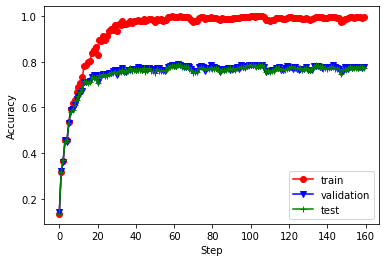

In [72]:
plt.plot(train_acc_his, 'ro-', label='train')
plt.plot(val_acc_his, 'bv-', label='validation')
plt.plot(test_acc_his, 'g+-', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.legend()
plt.show()